# Train OCR on Custom Font (PyTesseract)
I tried out the OCR of PyTesseract and the OCR is very accurate, but not 100% accurate. I am sure that if I train the OCR on my font, that it will perform better.

### Import Dependencies

In [2]:
import sys
import PIL
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:/Users/kaan-/AppData/Local/Programs/Tesseract-OCR/tesseract.exe'

print("python: " + sys.version[0:7])
print("PIL: " + PIL.__version__)
print("pytesseract: " + pytesseract.__version__)

python: 3.9.18 
PIL: 9.5.0
pytesseract: 0.3.10


### Test the OCR
Here you can see 4 examples on how accurate the OCR is

example 1:

In [3]:
expected_string = "CrossyChainsaw\n<Frost>"
img_file = "./data/player_name_data/crossychainsaw.png"
img = Image.open(img_file)
ocr_result = pytesseract.image_to_string(img)
print("- Result -")
print(ocr_result)
print("- Expected -")
print(expected_string)

- Result -
CrossyChainsaw
<Frost>

- Expected -
CrossyChainsaw
<Frost>


example 2:

In [3]:
expected_string = "1v1 World Champion '20\nKurisu Makise <3\n<Kingdom Org>"
img_file = "./data/player_name_data/pavelski.png"
img = Image.open(img_file)
ocr_result = pytesseract.image_to_string(img)
print("- Result -")
print(ocr_result)
print("- Expected -")
print(expected_string)

- Result -
Iv1 World Champion “
Kurisu Makise <3
<Kingdom Org>

- Expected -
1v1 World Champion '20
Kurisu Makise <3
<Kingdom Org>


example 3:

In [4]:
expected_string = "BCX Finalist '21\nTaher#FreePalestine\n<Ascenders of Asgard>"
img_file = "./data/player_name_data/taher.png"
img = Image.open(img_file)
ocr_result = pytesseract.image_to_string(img)
print("- Result -")
print(ocr_result)
print("- Expected -")
print(expected_string)

- Result -
BCX Finalist ‘21
Taher#FreePalestine
<Ascenders of Asgard>

- Expected -
BCX Finalist '21
Taher#FreePalestine
<Ascenders of Asgard>


example 4:

In [5]:
expected_string = "Valhallan S29\ny4c\n<Pandation>"
img_file = "./data/player_name_data/y4c.png"
img = Image.open(img_file)
ocr_result = pytesseract.image_to_string(img)
print("- Result -")
print(ocr_result)
print("- Expected -")
print(expected_string)

- Result -
Vaihatlan S29
yac
<Pandation>

- Expected -
Valhallan S29
y4c
<Pandation>


#### As you can see it is already pretty accurate, but we want a near perfect accuracy since this program will (in the end) be used for a big automised process.

I repeated the same training process over and over and over. I summed it up here so you have sort of an idea what is going on

### 1. Generate .tif files off of text data
we get all the values from `brawlhalla_names.csv` `brawlhalla_clans.csv` and `brawlhalla_titles.csv` and generate a .tif file. meaning we generate images where you can see the text on the image.

In [31]:
from PIL import Image, ImageDraw, ImageFont
import os

output_directory = './attempt7'
os.makedirs(output_directory, exist_ok=True)

text_file_path_1 = './data/brawlhalla_clans.csv'
text_file_path_2 = './data/brawlhalla_titles.csv'
text_file_path_3 = './data/brawlhalla_names.csv'
# Replace with the path to your custom font file
font_path = './ITC Eras Std Bold.otf'
font_size = 24
image_width = 600
image_height = 100


# clans
with open(text_file_path_1, 'r', encoding='utf-8') as file:
    lines = file.readlines()

i_save=0
for i, line in enumerate(lines):
    image = Image.new('RGB', (image_width, image_height), color='white')
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype(font_path, font_size)

    draw.text((10, 10), line.strip(), font=font, fill='black')

    output_path = os.path.join(output_directory, f'image_{i+1}.tif')
    image.save(output_path)
    i_save = i
print(f'{len(lines)} images generated in {output_directory}')


# titles
with open(text_file_path_2, 'r', encoding='utf-8') as file:
    lines = file.readlines()

i_save2=0
for i, line in enumerate(lines):
    image = Image.new('RGB', (image_width, image_height), color='white')
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype(font_path, font_size)

    draw.text((10, 10), line.strip(), font=font, fill='black')

    output_path = os.path.join(output_directory, f'image_{i+1+i_save}.tif')
    image.save(output_path)
    i_save2 = i+i_save
print(f'{len(lines)} images generated in {output_directory}')


# names
with open(text_file_path_3, 'r', encoding='utf-8') as file:
    lines = file.readlines()

for i, line in enumerate(lines):
    image = Image.new('RGB', (image_width, image_height), color='white')
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype(font_path, font_size)

    draw.text((10, 10), line.strip(), font=font, fill='black')

    output_path = os.path.join(output_directory, f'image_{i+1+i_save2}.tif')
    image.save(output_path)
print(f'{len(lines)} images generated in {output_directory}')

107 images generated in ./attempt7
102 images generated in ./attempt7
411 images generated in ./attempt7


Example of such .tif file

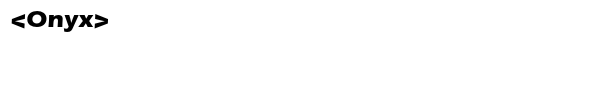

In [32]:
Image.open('./attempt7/image_1.tif') # clan

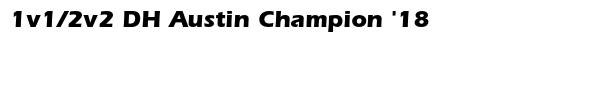

In [33]:
Image.open('./attempt7/image_179.tif') # Title

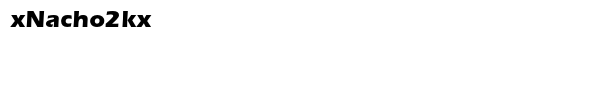

In [34]:
Image.open('./attempt7/image_600.tif') # name

### 2. Generate .box files off of .tif files
A box file is basically a file wherein foreach character it gives a boundary box. this will be used for training later. To do this we need to navigate to the folder with all the .tif images and run the command below. this generates a single .box file, meaning we have to run this 618 times.

In [35]:
! cd attempt7 & tesseract image_1.tif image_1 batch.nochop makebox

Estimating resolution as 209


In [64]:
box_file = './attempt7/image_1.box'
box_file

'./attempt7/image_1.box'

### 3. Generate .tr Files off of the .box files
again, we need to run this for all 618 files, doing this in command line

In [36]:
! cd attempt7 & tesseract image_1.tif image_1 box.train

Estimating resolution as 209
APPLY_BOXES: boxfile line 4/y ((59,68),(76,89)): FAILURE! Couldn't find a matching blob
APPLY_BOXES:
   Boxes read from boxfile:       6
   Boxes failed resegmentation:       1
   Found 5 good blobs.
Generated training data for 1 words


### 4. Extract Charset from all .box files
we input all our boxfiles and extract a charset from it, the command is too long here, in the command line on windows i wasnt able to input 618 either. in windows commandline i was able to get a max of 590, (mora than in jupyter so i did it in windows)

In [38]:
! cd attempt7 & unicharset_extractor "all_my_box_files"

The command line is too long.


### 5. Train the data
again too long to put here (kept going with only 590 files instead of all 618)

In [ ]:
! cd attempt7 & mftraining -F font_properties -U unicharset -O train.unicharset "all_my_training_files"
! cd attempt7 & cntraining "all_my_training_files"

### 6. Rename files
we need to rename the files so we can merge them into one file later on

In [39]:
!cd attempt7 & rename shapetable train.shapetable
!cd attempt7 & rename inttemp train.inttemp
!cd attempt7 & rename pffmtable train.pffmtable
!cd attempt7 & rename normproto train.normproto

### 7. Created traineddata file
here we combine the 4 files we just renamed to one trained "file". this file should make the ocr "smarter"

In [40]:
! cd attempt7 & combine_tessdata train.

Combining tessdata files
Output train.traineddata created successfully.


Version:v5.3.3.20231005
1:unicharset:size=4681, offset=192
3:inttemp:size=522794, offset=4873
4:pffmtable:size=610, offset=527667
5:normproto:size=9786, offset=528277
13:shapetable:size=1444, offset=538063
23:version:size=15, offset=539507


### 8. move the train.traineddata to the correct folder
I did this manually, we move the `train.traineddata` to the `tessdata` folder. This allows our OCR to use the traineddata

### 9. Testing out new Model
The model has been only trained on player names (don't mind if player clans or titles get displayed incorrectly). If the name gets displayed correctly now, it means it worked.

In [47]:
import os
os.environ["TESSDATA_PREFIX"] = "C:\\Users\\kaan-\\AppData\\Local\\Programs\\Tesseract-OCR\\tessdata"

In [50]:
expected_string = "1v1 World Champion '20\nKurisu Makise <3\n<Kingdom Org>"
image_path = "./data/player_name_data/pavelski.png"
custom_tessdata_dir = r'C:\Users\kaan-\AppData\Local\Programs\Tesseract-OCR\tessdata'
custom_language_code = "train"
# custom_text = pytesseract.image_to_string(Image.open(image_path), config='--psm 6 --tessdata-dir "C:\\Users\\kaan-\\AppData\\Local\\Programs\\Tesseract-OCR\\tessdata"')
custom_text = pytesseract.image_to_string(Image.open(image_path), config=f'--tessdata-dir "{custom_tessdata_dir}" -l {custom_language_code}')
print("- Result -")
print(custom_text)
print("- Expected -")
print(expected_string)

- Result -
IvI Wodd Champoon '
Kudsu Makise <3
<xjngdom org>

- Expected -
1v1 World Champion '20
Kurisu Makise <3
<Kingdom Org>


In [66]:
image_path = "./data/player_name_data/y4c.png"
custom_tessdata_dir = r'C:\Users\kaan-\AppData\Local\Programs\Tesseract-OCR\tessdata'
custom_language_code = "train"
# custom_text = pytesseract.image_to_string(Image.open(image_path), config='--psm 6 --tessdata-dir "C:\\Users\\kaan-\\AppData\\Local\\Programs\\Tesseract-OCR\\tessdata"')
custom_text = pytesseract.image_to_string(Image.open(image_path), config=f'--tessdata-dir "{custom_tessdata_dir}" -l {custom_language_code}')
old_result = pytesseract.image_to_string(image_path)
print("- First Result -")
print(old_result)
print("- Result Attempt 7 -")
print(custom_text)
print("- Expected -")
expected_string = "Valhallan S29\ny4c\n<Pandation>"
print(expected_string)

- First Result -
Vaihatlan S29
yac
<Pandation>

- Result Attempt 7 -
Vzhdon S29
y4c
<Pandztlon>

- Expected -
Valhallan S29
y4c
<Pandation>


## Conclusion
as we can see, it is not working as expected. The only reason I can come up with is that the data we trained on is too different than the data we test on. 

#### Test Data

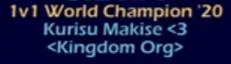

In [52]:
Image.open('./data/player_name_data/pavelski.png')

#### Train Data
Here is train data with similar text to the data we are testing

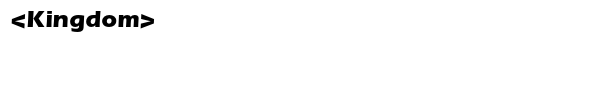

In [53]:
Image.open('./attempt7/image_103.tif')

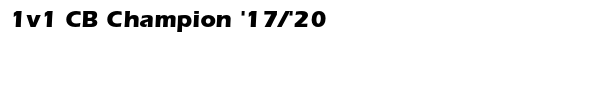

In [55]:
Image.open('./attempt7/image_177.tif')

So for a possible next iteration i could try to make the train data more like the test data, by adding a blue background and making the font smaller for example. 

<div style='background-color:yellow;font-size:80px;color:black;text-align:center;padding-top:10px;padding-bottom:10px'>Post Feedback</div>

Let's try to preprocess the data we test on and see if we get better results

## Finding best threshold (white text on black background, normalised pixel values)
### Default Model
I played around with the threshold and figured  60 is a good threshold for the original PyTesseract Model, making only 3 mistakes

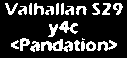

In [58]:
threshold = 60
test_image = Image.open('./data/player_name_data/y4c.png')
grayscaled_test_image = test_image.convert('L')
grayscaled_test_image
black_and_white_image = grayscaled_test_image.point(lambda x: 0 if x < threshold else 255, '1')
black_and_white_image

In [59]:
custom_tessdata_dir = r'C:\Users\kaan-\AppData\Local\Programs\Tesseract-OCR\tessdata'
custom_language_code = "train"

custom_text = pytesseract.image_to_string(black_and_white_image, config=f'--tessdata-dir "{custom_tessdata_dir}" -l {custom_language_code}')
old_result = pytesseract.image_to_string(black_and_white_image)
print("- First Result -")
print(old_result)
print("- Result Attempt 7 -")
print(custom_text)
print("- Expected -")
expected_string = "Valhallan S29\ny4c\n<Pandation>"
print(expected_string)

- First Result -
Vathallan $29
y4e
<Pandation>

- Result Attempt 7 -
VthaIIan S29
y4c
<Panda( n>

- Expected -
Valhallan S29
y4c
<Pandation>


### Custom Model
For my custom trained model the best threshold is 68 with only 3 mistakes where one of the mistakess is using an upper instead of a lower case which is pretty impresive. My model doesnt appear to be as bad as i thought it was.

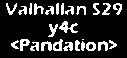

In [106]:
threshold = 68
test_image = Image.open('./data/player_name_data/y4c.png')
grayscaled_test_image = test_image.convert('L')
grayscaled_test_image
black_and_white_image = grayscaled_test_image.point(lambda x: 0 if x < threshold else 255, '1')
black_and_white_image

In [107]:
custom_tessdata_dir = r'C:\Users\kaan-\AppData\Local\Programs\Tesseract-OCR\tessdata'
custom_language_code = "train"

custom_text = pytesseract.image_to_string(black_and_white_image, config=f'--tessdata-dir "{custom_tessdata_dir}" -l {custom_language_code}')
old_result = pytesseract.image_to_string(black_and_white_image)
print(f'threshold: {threshold}')
print("- First Result -")
print(old_result)
print("- Result Attempt 7 -")
print(custom_text)
print("- Expected -")
expected_string = "Valhallan S29\ny4c\n<Pandation>"
print(expected_string)

threshold: 68
- First Result -
Vaihallan $29
ya
<Pandation>

- Result Attempt 7 -
Valhallan S29
y4C
<Panda2lon>

- Expected -
Valhallan S29
y4c
<Pandation>


## Finding Best Threshold (Black text on white background, normalised pixel values)
### Default Model
3 mistakes on threshold 60 for the default model

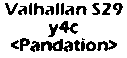

In [3]:
threshold = 60
test_image = Image.open('./data/player_name_data/y4c.png')
grayscaled_test_image = test_image.convert('L')
grayscaled_test_image
black_and_white_image = grayscaled_test_image.point(lambda x: 255 if x < threshold else 0, '1')
black_and_white_image

In [4]:
custom_tessdata_dir = r'C:\Users\kaan-\AppData\Local\Programs\Tesseract-OCR\tessdata'
custom_language_code = "train"

custom_text = pytesseract.image_to_string(
    black_and_white_image, config=f'--tessdata-dir "{custom_tessdata_dir}" -l {custom_language_code}')
old_result = pytesseract.image_to_string(black_and_white_image)
print("- First Result -")
print(old_result)
print("- Result Attempt 7 -")
print(custom_text)
print("- Expected -")
expected_string = "Valhallan S29\ny4c\n<Pandation>"
print(expected_string)

- First Result -
Vathallan $29

yac
<Pandation>

- Result Attempt 7 -
VthaIIan S29

y4c
<Panda(ion>

- Expected -
Valhallan S29
y4c
<Pandation>


### Custom Model
2 mistakes on 58 for my own model

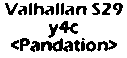

In [5]:
threshold = 58
test_image = Image.open('./data/player_name_data/y4c.png')
grayscaled_test_image = test_image.convert('L')
grayscaled_test_image
black_and_white_image = grayscaled_test_image.point(
    lambda x: 255 if x < threshold else 0, '1')
black_and_white_image

In [8]:
custom_tessdata_dir = r'C:\Users\kaan-\AppData\Local\Programs\Tesseract-OCR\tessdata'
custom_language_code = "train"

custom_text = pytesseract.image_to_string(
    black_and_white_image, config=f'--tessdata-dir "{custom_tessdata_dir}" -l {custom_language_code}')
old_result = pytesseract.image_to_string(black_and_white_image)
print("- First Result -")
print(old_result)
print("- Custom Model Result (Attempt 7) -")
print(custom_text)
print("- Expected -")
expected_string = "Valhallan S29\ny4c\n<Pandation>"
print(expected_string)

- First Result -
Vathallan S29
yt
<Pandation>

- Custom Model Result (Attempt 7) -
Vthallan S29
y4c
<Pandation>

- Expected -
Valhallan S29
y4c
<Pandation>


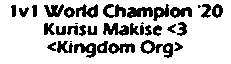

In [9]:
threshold = 58
test_image = Image.open('./data/player_name_data/pavelski.png')
grayscaled_test_image = test_image.convert('L')
grayscaled_test_image
black_and_white_image = grayscaled_test_image.point(
    lambda x: 255 if x < threshold else 0, '1')
black_and_white_image

In [10]:
custom_tessdata_dir = r'C:\Users\kaan-\AppData\Local\Programs\Tesseract-OCR\tessdata'
custom_language_code = "train"

custom_text = pytesseract.image_to_string(
    black_and_white_image, config=f'--tessdata-dir "{custom_tessdata_dir}" -l {custom_language_code}')
old_result = pytesseract.image_to_string(black_and_white_image)
print("- First Result -")
print(old_result)
print("- Custom Model Result (Attempt 7) -")
print(custom_text)
print("- Expected -")
expected_string = "1v1 World Champion '20\nKurisu Makise <3\n<Kingdom Org>"
print(expected_string)

- First Result -
1v1 Wortd Champion ‘20
Kurisu Makise <3
<Kingdom Org>

- Custom Model Result (Attempt 7) -
Ivl World Chzmplon '20
Kurisu Makise <3
<ngdom org>

- Expected -
1v1 World Champion '20
Kurisu Makise <3
<Kingdom Org>


## What now?
I think for now we can try to make the train data more similar to the test data. that sounds like the most logical step to do